### 泰坦尼克幸存者预测

In [46]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

### 1.数据预处理

In [5]:
df = pd.read_csv("./data/data.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#去除不必要的特征, Cabin的缺失值过多，删去后不会对最终的分类结果产生影响
df.drop(['Name', "Ticket", "Cabin"], axis=1, inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
# 缺失值的处理, 年龄以平均值进行填充
df.Age.fillna(df.Age.mean(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
# 删除缺失值, 默认删除行
df = df.dropna()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [13]:
# 转换数据类型
df.Sex = (df.Sex == "male").astype("int")

In [16]:
labels = df.Embarked.unique().tolist()
labels

[0, 1, 2]

In [15]:
# 编码数据，使其具有数字性质
df.Embarked = df.Embarked.apply(lambda x : labels.index(x))

In [56]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [18]:
## 提取数据，训练集和样本集合
data = df.loc[:, df.columns != "Survived"]
target = df.loc[:, df.columns == "Survived"]

In [19]:
# 训练集
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [20]:
# 样本集合
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### 可视化数据

0    549
1    340
Name: Survived, dtype: int64


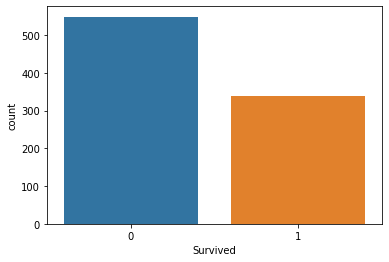

In [39]:
# 生存比例
print(target.Survived.value_counts())
sns.countplot(x="Survived", data=target)
plt.show()

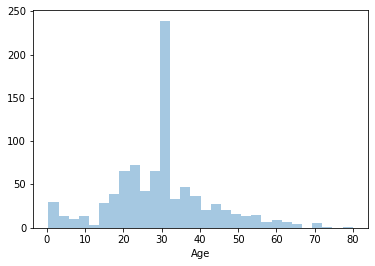

In [49]:
# 年龄分布
sns.distplot(data.Age, kde=False)
plt.show()

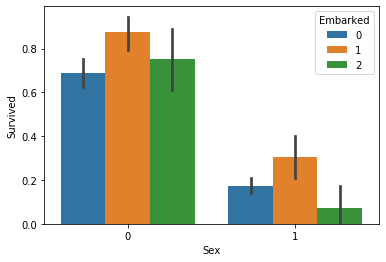

In [56]:
sns.barplot(x="Sex", y = "Survived",hue="Embarked", data=df)
plt.show()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null int64
dtypes: float64(2), int64(6)
memory usage: 102.5 KB


### 2.模型导入与训练

In [60]:
# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.3)
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
234,235,2,1,24.0,0,0,10.5000,0
836,837,3,1,21.0,0,0,8.6625,0
225,226,3,1,22.0,0,0,9.3500,0
884,885,3,1,25.0,0,0,7.0500,0
217,218,2,1,42.0,1,0,27.0000,0


In [68]:
# 调整index
for i in [X_train, X_test, Y_train, Y_test]:
    i.index = range(i.shape[0])

In [87]:
# 导入模型进行训练
clf = tree.DecisionTreeClassifier(random_state=10
                                  ,criterion="gini"
                                  ,max_depth = 5
                                  ,min_samples_leaf = 5
#                                  ,min_samples_split = 1
                                  ,splitter = "random"
                                 )
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='random')

### 3．模型的优化

In [90]:
# 训练集
clf.score(X_train, Y_train)

0.8231511254019293

In [91]:
# 测试集（模型过拟合）
clf.score(X_test, Y_test)

0.7902621722846442

In [82]:
# 最重要的特征是会 "Sex"
list(zip(X_train.columns, clf.feature_importances_))

[('PassengerId', 0.050790561704884954),
 ('Pclass', 0.19376510852124962),
 ('Sex', 0.5451297574686098),
 ('Age', 0.052652328035553336),
 ('SibSp', 0.07506404193121959),
 ('Parch', 0.0),
 ('Fare', 0.08259820233848263),
 ('Embarked', 0.0)]

#### 交叉验证

In [172]:
# 交叉验证，选择模型
score = cross_val_score(clf, data, target, cv=10).mean()
score

0.782967313585291

In [86]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 10,
 'splitter': 'best'}

#### 网格搜索

In [159]:
# 网格搜索, 最优的参数值
paramters = {"splitter": ("best", "random")
            ,"criterion":("entropy", "gini")
            ,"max_depth": [*range(1, 10)]
            ,"min_samples_leaf": [*range(1, 50, 5)]
            }

clf = tree.DecisionTreeClassifier(random_state=10)
GS = GridSearchCV(clf, param_grid=paramters, cv = 10)
GS.fit(data, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
           

In [185]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [186]:
GS.best_score_

0.8200224971878515

In [187]:
GS.scoring